In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.1)
import pandas as pd
import warnings
import sys
import dabest
from scipy import stats
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from reliability_correlation import GetData as gd2

In [3]:
DirectoryName = '/Users/seetha/Box Sync/MultiDayData/Data/'
CombinedFolderName = '/Users/seetha/Box Sync/MultiDayData/PlaceCellResultsAll/'
SaveFigureFolder = '/Users/seetha/Box Sync/MultiDayData/MultiDayPaper/Figures/FigurepanelsPDF/PV_correlation_rel/'

## With Task1

In [4]:
r1 = gd2(FolderName=DirectoryName, CombinedDataFolder=CombinedFolderName, 
         basetask=['Task1'], taskstoplot=['Task2', 'Task5'])

Index(['Task', 'CellNumber', 'PlaceCellNumber', 'NumPlacecells', 'COM',
       'WeightedCOM', 'Precision', 'Precision_rising', 'Width', 'FiringRatio',
       'Firingintensity', 'Reliability', 'animalname'],
      dtype='object')
NR34
High (99,)
Low (193,)
CFC17
High (145,)
Low (127,)
NR32
High (67,)
Low (116,)
CFC16
High (51,)
Low (425,)
CFC18
High (171,)
Low (328,)


In [5]:
r2 = gd2(FolderName=DirectoryName, CombinedDataFolder=CombinedFolderName, 
         basetask=['Task3'], taskstoplot=['Task4'])

Index(['Task', 'CellNumber', 'PlaceCellNumber', 'NumPlacecells', 'COM',
       'WeightedCOM', 'Precision', 'Precision_rising', 'Width', 'FiringRatio',
       'Firingintensity', 'Reliability', 'animalname'],
      dtype='object')
NR34
High (59,)
Low (522,)
CFC17
High (79,)
Low (207,)
NR32
High (18,)
Low (253,)
CFC16
High (12,)
Low (511,)
CFC18
High (101,)
Low (593,)


In [ ]:
X = r2.animal_highrel['Task4'] + r1.animal_highrel['Task2']
np.mean(np.asarray(X)[:, 1:].flatten())

In [ ]:
for i in [r1.animal_highrel['Task2'], r1.animal_lowrel['Task2']]:
    data = np.asarray(i)[:, 0].flatten() #lapnumber
    mean = np.mean(data)
    ci = stats.norm.interval(alpha=0.99, loc=np.mean(data), scale=stats.sem(data))
    print('Mean %0.3f, CI %0.3f' %(mean, mean-ci[0]))

In [ ]:
for i in [r2.animal_highrel['Task4'], r2.animal_lowrel['Task4']]:
    data = np.asarray(i)[:, 0].flatten() #lapnumber
    mean = np.mean(data)
    ci = stats.norm.interval(alpha=0.99, loc=np.mean(data), scale=stats.sem(data))
    print('Mean %0.3f, CI %0.3f' %(mean, mean-ci[0]))

In [ ]:
fs, ax = plt.subplots(1, 2)
r1.plot_lapwise_correlation(ax)
for a in ax:
    a.set_ylim(0, 0.9)
sns.despine(fs)
fs.set_size_inches((6, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Lapwisecorrelationtrace_byreliability_Task1.pdf'), bbox_inches='tight')

In [ ]:
fs, ax = plt.subplots(2, 2, sharex='row', sharey='row')
r1.plot_by_reliability(ax, taskstoplot=['Task2', 'Task5'])
for a in ax[0, :]:
    a.set_ylim(0, 1)
    a.set_xlim(-0.5, 1)
for a in ax[1, :]:
    a.set_ylim(0, 0.8)
fs.tight_layout()
fs.set_size_inches((4, 5))
fs.savefig(os.path.join(SaveFigureFolder, 'Correlationbyreliability_Task1.pdf'), bbox_inches='tight')

## With Task3

In [ ]:
fs, ax = plt.subplots(1, 2)
r2.plot_lapwise_correlation(ax)
for a in ax:
    a.set_ylim(0, 0.9)
sns.despine(fs)
fs.set_size_inches((6, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Lapwisecorrelationtrace_byreliability_Task3.pdf'), bbox_inches='tight')

In [ ]:
fs, ax = plt.subplots(2, 2, sharex='row', sharey='row')
r2.plot_by_reliability(ax, taskstoplot=['Task4'])
for a in ax[0, :]:
    a.set_ylim(0, 1)
    a.set_xlim(-0.5, 1)
for a in ax[1, :]:
    a.set_ylim(0, 0.8)
fs.tight_layout()
fs.set_size_inches((4, 5))
fs.savefig(os.path.join(SaveFigureFolder, 'Correlationbyreliability_Task3.pdf'), bbox_inches='tight')

## Plot rewarded and unrewarded

In [6]:
r1.corrdf['Reliability_Type'] = 'High_Task1'
r1.corrdf.loc[r1.corrdf['Reliability']<0.5, 'Reliability_Type'] = 'Low_Task1'

In [7]:
r2.corrdf['Reliability_Type'] = 'High_Task3'
r2.corrdf.loc[r2.corrdf['Reliability']<0.5, 'Reliability_Type'] = 'Low_Task3'
r1.corrdf['Reward'] = 'Yes'
r2.corrdf['Reward'] = 'No'

In [8]:
df = pd.concat((r1.corrdf, r2.corrdf))
df = df[df['Task'].isin(['Task2', 'Task4'])]
df = df.dropna()

In [9]:
df['Task'].unique()

array(['Task2', 'Task4'], dtype=object)

In [10]:
thisdata = df.groupby(by=['AnimalName', 'Reliability_Type'])['Correlation'].mean().reset_index()
thisdata = thisdata.pivot(index='AnimalName', columns='Reliability_Type', values='Correlation').reset_index()
thisdata

Reliability_Type,AnimalName,High_Task1,High_Task3,Low_Task1,Low_Task3
0,CFC16,0.474203,0.705788,0.242050,0.309551
1,CFC17,0.667964,0.767814,0.402047,0.407084
2,CFC18,0.689376,0.665683,0.391060,0.437851
3,NR32,0.609352,0.420399,0.466028,0.261275
4,NR34,0.643743,0.475972,0.474971,0.166486


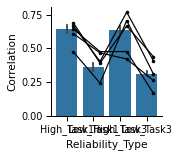

In [11]:
fs, ax = plt.subplots(1)
order = ['High_Task1', 'Low_Task1', 'High_Task3', 'Low_Task3']
sns.barplot(data=df, x='Reliability_Type', y='Correlation', order=order, ax=ax)
for i, r in thisdata.iterrows():
    ax.plot([0.25, 1.25, 2.25, 3.25], r[order].to_list(), 'k.-', markersize=5)
sns.despine(fs)
ax.locator_params(axis='y', nbins=4)
fs.set_size_inches((2, 2))
# fs.savefig(os.path.join(SaveFigureFolder, 'Correlationbyreliability_alltasks_point6.pdf'), bbox_inches='tight')

In [12]:
from scipy import stats
import statsmodels.stats.multicomp as mc
subset_m = thisdata[order].melt()
comp1 = mc.MultiComparison(subset_m['value'], subset_m['Reliability_Type'])
tbl, a1, a2 = comp1.allpairtest(stats.ttest_rel, method= "bonf")
tbl

group1,group2,stat,pval,pval_corr,reject
High_Task1,High_Task3,0.1227,0.9083,1.0,False
High_Task1,Low_Task1,7.6314,0.0016,0.0095,True
High_Task1,Low_Task3,5.6821,0.0047,0.0284,True
High_Task3,Low_Task1,2.1094,0.1026,0.6154,False
High_Task3,Low_Task3,6.6988,0.0026,0.0155,True
Low_Task1,Low_Task3,1.0489,0.3534,1.0,False
